In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
dfs = []
for i in range(1,12):
    with open(f"../datascraping/nyt/nyt_metadata_{i}.json") as f:
        df = pd.read_json(f)
        dfs.append(df)

In [10]:
merged_df = pd.concat(dfs, ignore_index=True)

C:\Users\Oskar\AppData\Local\Temp\ipykernel_3520\733524931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_dates_df['pub_date']=pd.to_datetime(entry_dates_df['pub_date']).dt.strftime('%Y%m%d')


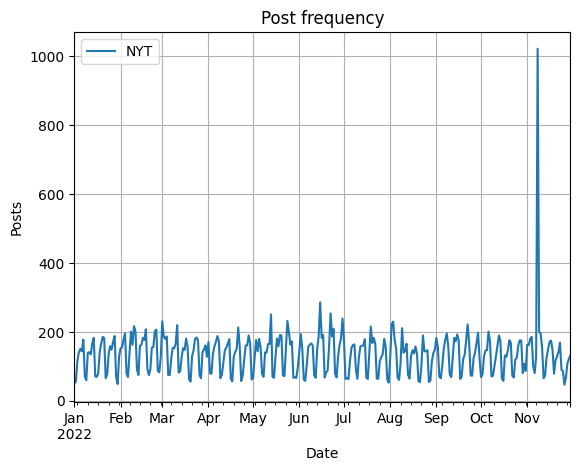

In [110]:
entry_dates_df=merged_df[['pub_date']]
entry_dates_df['pub_date']=pd.to_datetime(entry_dates_df['pub_date']).dt.strftime('%Y%m%d')
entry_counts_df=entry_dates_df.groupby('pub_date').size()
entry_counts_df = entry_counts_df.to_frame()
entry_counts_df.index = pd.to_datetime(entry_counts_df.index,format = '%Y%m%d')
smoothed = entry_counts_df.rolling(window=10).mean()

ax = entry_counts_df.plot(kind='line', title='Post frequency', grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Posts')
ax.legend(['NYT'])
plt.show()